In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
date = 'Jan 1 1970'

In [3]:
pd.to_datetime(date)

Timestamp('1970-01-01 00:00:00')

### Sometimes it doesnt work

In [4]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


https://docs.python.org/3/library/datetime.html

In [ ]:
pd.to_datetime('Jan:1:1970', format='')

In [5]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [6]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [7]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [8]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [9]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [10]:
df.date.dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [11]:
df.date.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

In [12]:
df['year'] = df.date.dt.year

In [13]:
df.head()

,date,coffee_consumption,year
0,2019-01-01,14.301915,2019
1,2019-01-02,12.905900,2019
2,2019-01-03,10.046015,2019
3,2019-01-04,6.354805,2019
4,2019-01-07,8.545563,2019


In [15]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()

In [16]:
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


<AxesSubplot:>

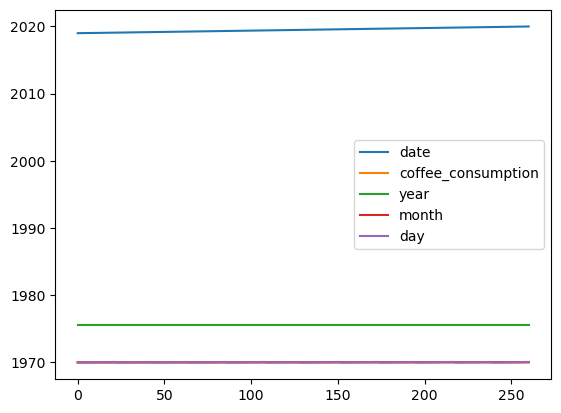

In [18]:
df.plot()

earliest dates up top

In [20]:
# for timeseries, the best idea is to set the index as the day time
df = df.set_index('date').sort_index()

In [21]:
df.head()

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday
2019-01-02,12.905900,2019,1,2,Wednesday
2019-01-03,10.046015,2019,1,3,Thursday
2019-01-04,6.354805,2019,1,4,Friday
2019-01-07,8.545563,2019,1,7,Monday


<AxesSubplot:xlabel='date'>

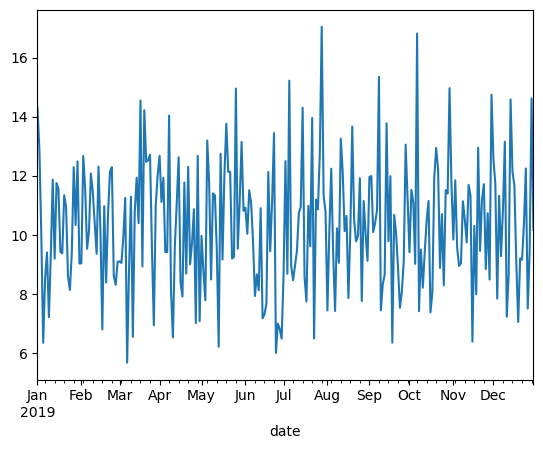

In [22]:
df.coffee_consumption.plot()

### Some more attributes

In [23]:
# becasue this is now in the index we no longer need to do the .dt
df.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=261)

In [24]:
df.groupby('weekday').mean()

,coffee_consumption,year,month,day
weekday,,,,
Friday,10.117923,2019.0,6.519231,15.442308
Monday,11.738143,2019.0,6.615385,15.500000
Thursday,9.970706,2019.0,6.461538,16.173077
Tuesday,9.879956,2019.0,6.528302,15.641509
Wednesday,9.882796,2019.0,6.442308,15.769231


<AxesSubplot:xlabel='weekday'>

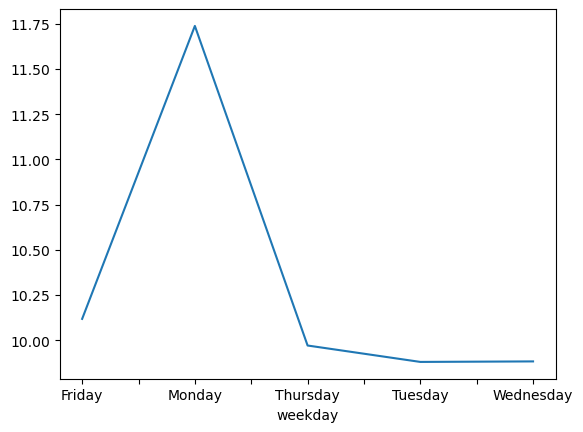

In [26]:
df.groupby('weekday').mean().coffee_consumption.plot()

In [27]:
# gettin the number day of the week
df['weekday_number'] = df.index.day_of_week
df.head()

,coffee_consumption,year,month,day,weekday,weekday_number
date,,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday,1
2019-01-02,12.905900,2019,1,2,Wednesday,2
2019-01-03,10.046015,2019,1,3,Thursday,3
2019-01-04,6.354805,2019,1,4,Friday,4
2019-01-07,8.545563,2019,1,7,Monday,0


In [28]:
# sorting by the number day of the week
df.groupby('weekday').mean().sort_values('weekday_number')

,coffee_consumption,year,month,day,weekday_number
weekday,,,,,
Monday,11.738143,2019.0,6.615385,15.500000,0.0
Tuesday,9.879956,2019.0,6.528302,15.641509,1.0
Wednesday,9.882796,2019.0,6.442308,15.769231,2.0
Thursday,9.970706,2019.0,6.461538,16.173077,3.0
Friday,10.117923,2019.0,6.519231,15.442308,4.0


<AxesSubplot:xlabel='weekday'>

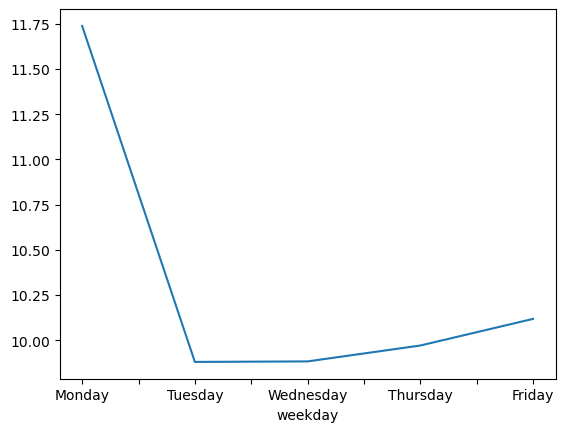

In [30]:
# plotting to get a more accurate represemtartion of the day of the week
df.groupby('weekday').mean().sort_values('weekday_number').coffee_consumption.plot()

### Subsetting Data

In [ ]:
# checking the index
df.index

In [32]:
# regular subset
df.loc['2019-01-01']

coffee_consumption    14.301915
year                       2019
month                         1
day                           1
weekday                 Tuesday
weekday_number                1
Name: 2019-01-01 00:00:00, dtype: object

In [35]:
# subsetting more
df.loc['2019-01':'2019-05']

,coffee_consumption,year,month,day,weekday,weekday_number
date,,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday,1
2019-01-02,12.905900,2019,1,2,Wednesday,2
2019-01-03,10.046015,2019,1,3,Thursday,3
2019-01-04,6.354805,2019,1,4,Friday,4
2019-01-07,8.545563,2019,1,7,Monday,0
...,...,...,...,...,...,...
2019-05-27,14.952719,2019,5,27,Monday,0
2019-05-28,9.538674,2019,5,28,Tuesday,1
2019-05-29,11.130547,2019,5,29,Wednesday,2


### Change period of the data

In [36]:
df.columns

Index(['coffee_consumption', 'year', 'month', 'day', 'weekday',
       'weekday_number'],
      dtype='object')

In [38]:
df = df.drop(columns=['year', 'month', 'day', 'weekday',
       'weekday_number'])

In [39]:
# monthly periods
by_month = df.asfreq('M')

In [43]:
by_month.tail()

,coffee_consumption
date,
2019-08-31,NaN
2019-09-30,11.282275
2019-10-31,11.734257
2019-11-30,NaN
2019-12-31,10.168315


In [42]:
df.asfreq('Y')

,coffee_consumption
date,
2019-12-31,10.168315


# First day of the month

In [45]:
# getting the 
by_month_first_day = df.asfreq('MS')
by_month_first_day.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-02-01,9.042273
2019-03-01,9.109061
2019-04-01,12.678782
2019-05-01,9.970773


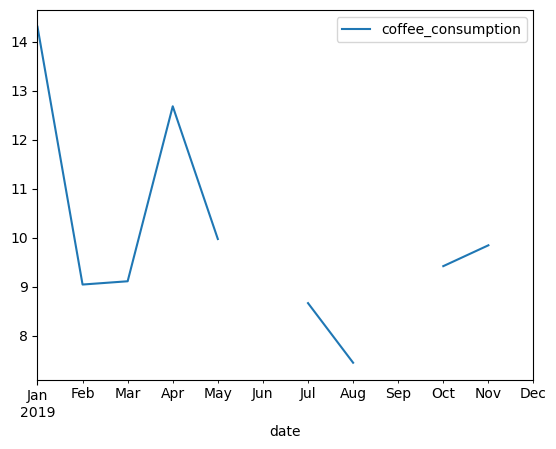

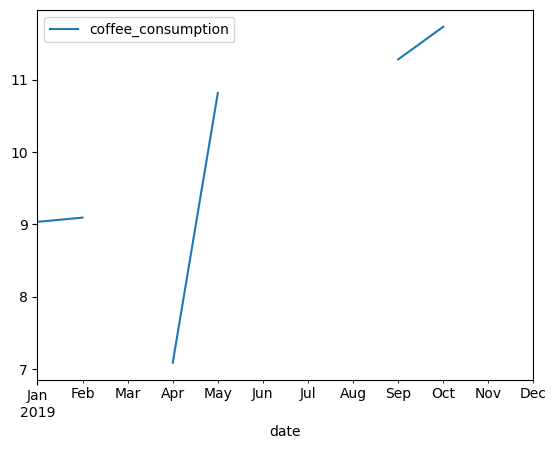

In [52]:
by_month_first_day.plot(label='begin')
by_month.plot(label='end')
plt.legend()
plt.show()

### Upsample

In [53]:
by_hour = df.asfreq('H')

In [55]:
by_hour.assign(ffill = lambda df: df.coffee_consumption.ffill(),
              bfill = lambda df: df.coffee_consumption.bfill())

,coffee_consumption,ffill,bfill
date,,,
2019-01-01 00:00:00,14.301915,14.301915,14.301915
2019-01-01 01:00:00,NaN,14.301915,12.905900
2019-01-01 02:00:00,NaN,14.301915,12.905900
2019-01-01 03:00:00,NaN,14.301915,12.905900
2019-01-01 04:00:00,NaN,14.301915,12.905900
...,...,...,...
2019-12-30 20:00:00,NaN,14.623106,10.168315
2019-12-30 21:00:00,NaN,14.623106,10.168315
2019-12-30 22:00:00,NaN,14.623106,10.168315


In [56]:
by_hour = df.asfreq('H', method='ffill')

In [57]:
by_hour

,coffee_consumption
date,
2019-01-01 00:00:00,14.301915
2019-01-01 01:00:00,14.301915
2019-01-01 02:00:00,14.301915
2019-01-01 03:00:00,14.301915
2019-01-01 04:00:00,14.301915
...,...
2019-12-30 20:00:00,14.623106
2019-12-30 21:00:00,14.623106
2019-12-30 22:00:00,14.623106


### Resampling

In [59]:
# similar to a groupby
monthly_df = df.resample('M').mean()

In [61]:
monthly_df.head()

,coffee_consumption
date,
2019-01-31,10.170728
2019-02-28,10.301943
2019-03-31,10.465667
2019-04-30,10.092301
2019-05-31,10.803482


In [64]:
weekly_df = df.resample('W').mean()

<function matplotlib.pyplot.show(close=None, block=None)>

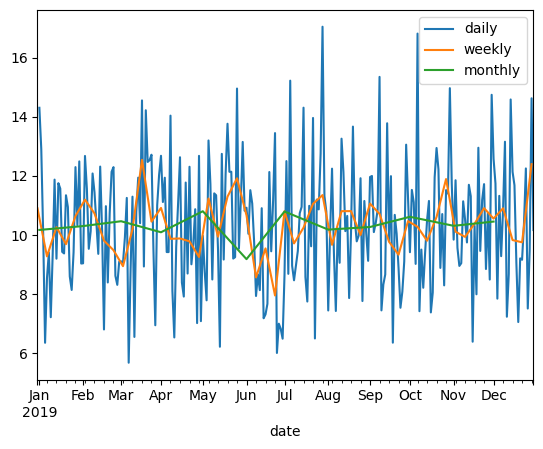

In [67]:
df.coffee_consumption.plot(label='daily')
weekly_df.coffee_consumption.plot(label='weekly')
monthly_df.coffee_consumption.plot(label='monthly')
plt.legend()
plt.show

In [70]:
# starts after the rolling minimum is met
df.rolling(5).mean().head(15)

,coffee_consumption
date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,10.430840
2019-01-08,9.452477
2019-01-09,8.315151
2019-01-10,8.173639
2019-01-11,9.277212


In [74]:
# df.resample('W').mean().coffee_consumption.rolling(2).mean()

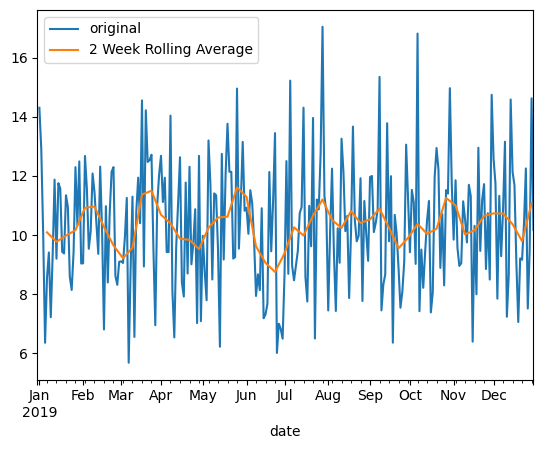

In [75]:
df.coffee_consumption.plot(label='original')
df.resample('W').mean().coffee_consumption.rolling(2).mean().plot(label='2 Week Rolling Average')
plt.legend()
plt.show()

### Lagging or Leading Data

In [76]:
# one way to get rid of trends or seasonality (make the data stationary)
df['shift_by_one'] = df.coffee_consumption.shift(1)
df.head()

,coffee_consumption,shift_by_one
date,,
2019-01-01,14.301915,NaN
2019-01-02,12.905900,14.301915
2019-01-03,10.046015,12.905900
2019-01-04,6.354805,10.046015
2019-01-07,8.545563,6.354805


In [77]:
# calculating the diffrences
df['daily_difference'] = df['coffee_consumption'] - df['shift_by_one']
df.head()

,coffee_consumption,shift_by_one,daily_difference
date,,,
2019-01-01,14.301915,NaN,NaN
2019-01-02,12.905900,14.301915,-1.396015
2019-01-03,10.046015,12.905900,-2.859885
2019-01-04,6.354805,10.046015,-3.691210
2019-01-07,8.545563,6.354805,2.190757


In [78]:
# we can also shift backwards
df.coffee_consumption.shift(-1)

date
2019-01-01    12.905900
2019-01-02    10.046015
2019-01-03     6.354805
2019-01-04     8.545563
2019-01-07     9.410101
                ...    
2019-12-25     7.513206
2019-12-26     9.464345
2019-12-27    14.623106
2019-12-30    10.168315
2019-12-31          NaN
Name: coffee_consumption, Length: 261, dtype: float64

In [81]:
# this does the above two steps in one - a shift and a substraction
df['diff(1)'] = df.coffee_consumption.diff(1)
df.head()

,coffee_consumption,shift_by_one,daily_difference,diff(1)
date,,,,
2019-01-01,14.301915,NaN,NaN,NaN
2019-01-02,12.905900,14.301915,-1.396015,-1.396015
2019-01-03,10.046015,12.905900,-2.859885,-2.859885
2019-01-04,6.354805,10.046015,-3.691210,-3.691210
2019-01-07,8.545563,6.354805,2.190757,2.190757


### Calculate the ROI

### Timezone

In [82]:
t = pd.Timestamp('2020-04-14 10:25:25')
t

Timestamp('2020-04-14 10:25:25')

In [83]:
t1 = pd.Timestamp('2020-04-14 10:25:25', tz='US/Central')

In [84]:
t1

Timestamp('2020-04-14 10:25:25-0500', tz='US/Central')

In [86]:
t1 = t1.tz_convert(tz='Asia/Tokyo')
t1

Timestamp('2020-04-15 00:25:25+0900', tz='Asia/Tokyo')

### Timedelta

In [87]:
t

Timestamp('2020-04-14 10:25:25')

In [88]:
t + pd.Timedelta('1d')

Timestamp('2020-04-15 10:25:25')

Timedelta = change in time
delta is some change in math

In [89]:
# Current time for the comupter im currently using
now = pd.Timestamp.now()

In [90]:
now

Timestamp('2023-04-20 10:36:28.392367')